In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Explore fitnesses across generations

In [2]:
df_fitness = pd.read_csv("results/best_fitnesses.csv", header=None)
# drop last column of NaNs
df_fitness = df_fitness.drop(df_fitness.columns[len(df_fitness.columns)-1], axis=1)
# Add column names
columns = ["parallel_strategy"]
columns.extend(["gen_" + str(i) for i in range(0, 50)])
df_fitness.columns = columns


df_fitness.head()

,parallel_strategy,gen_0,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,...,gen_40,gen_41,gen_42,gen_43,gen_44,gen_45,gen_46,gen_47,gen_48,gen_49
0,sequential,4.458320e-07,4.516300e-07,4.575720e-07,4.656800e-07,4.729350e-07,4.767450e-07,4.807230e-07,4.818950e-07,4.843570e-07,...,5.286550e-07,5.344930e-07,5.326480e-07,5.296480e-07,5.305840e-07,5.306770e-07,5.312200e-07,5.351960e-07,5.305620e-07,5.342160e-07
1,threads1,4.450080e-07,4.492710e-07,4.591180e-07,4.639570e-07,4.699690e-07,4.716410e-07,4.730020e-07,4.790150e-07,4.831790e-07,...,5.311190e-07,5.259970e-07,5.306420e-07,5.296740e-07,5.287620e-07,5.320580e-07,5.296720e-07,5.318360e-07,5.305540e-07,5.311140e-07
2,fastflow1,4.523450e-07,4.551620e-07,4.587580e-07,4.604540e-07,4.713440e-07,4.701360e-07,4.704590e-07,4.761190e-07,4.787120e-07,...,5.432060e-07,5.449470e-07,5.449590e-07,5.432110e-07,5.436860e-07,5.464630e-07,5.510740e-07,5.480480e-07,5.466930e-07,5.503170e-07
3,threads2,4.444570e-07,4.515820e-07,4.570620e-07,4.626070e-07,4.668230e-07,4.703760e-07,4.714400e-07,4.806040e-07,4.851620e-07,...,5.274960e-07,5.272880e-07,5.329280e-07,5.330510e-07,5.333700e-07,5.371150e-07,5.357670e-07,5.402580e-07,5.417130e-07,5.428670e-07
4,fastflow2,4.467160e-07,4.540590e-07,4.595410e-07,4.699950e-07,4.693080e-07,4.729270e-07,4.811530e-07,4.800260e-07,4.841240e-07,...,5.411170e-07,5.366580e-07,5.349260e-07,5.357970e-07,5.339080e-07,5.383970e-07,5.367040e-07,5.421870e-07,5.370460e-07,5.410470e-07


Plot of fitness across generation for Sequential strategy.

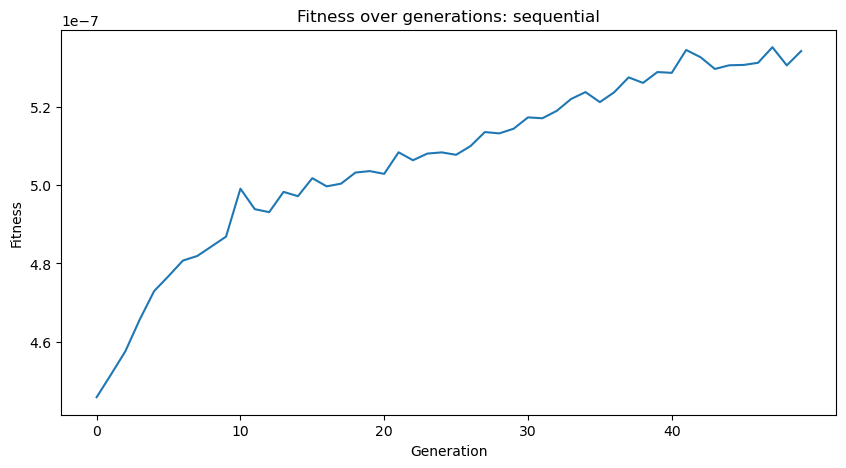

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[0, 1:])
plt.title('Fitness over generations: ' + df_fitness.iloc[0, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 50, 10), labels=np.arange(0, 50, 10))
plt.show()


Plot of fitness across generation for Fastflow (32 workers) strategy.

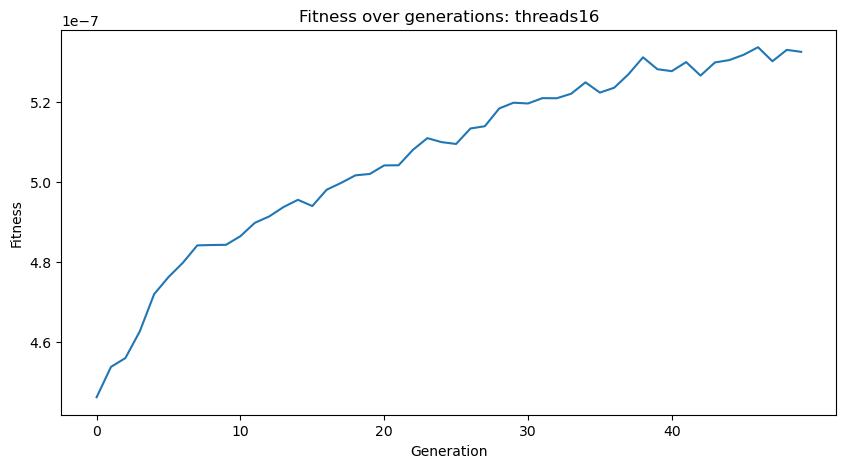

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[17, 1:])
plt.title('Fitness over generations: ' + df_fitness.iloc[17, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 50, 10), labels=np.arange(0, 50, 10))
plt.show()

Plot of fitness across generation for Threads (32 workers) strategy.

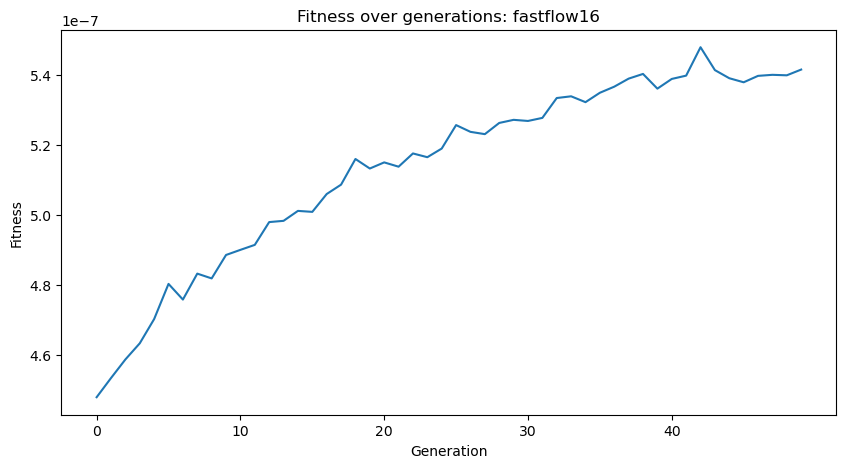

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[18, 1:])
plt.title('Fitness over generations: ' + df_fitness.iloc[18, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 50, 10), labels=np.arange(0, 50, 10))
plt.show()

# Sequential and parallelizable parts of the program

In [6]:
df_sequential = pd.read_csv('results/sequential_results.csv')
df_sequential.head()

,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,5.354360e-07,105526351,20666,92633,5323,105341764,0,0,0


In [7]:
# Calulate the column "otherTime" in the dataframe (totalTime - distanceTime - initializationTimeRandom - initializationTimeEmpty - evolutionTime)
df_sequential['otherTime'] = df_sequential['totalTime'] - df_sequential['distanceTime'] - df_sequential['initializationTimeRandom'] - df_sequential['initializationTimeEmpty'] - df_sequential['evolutionTime']

Pieplot over the times

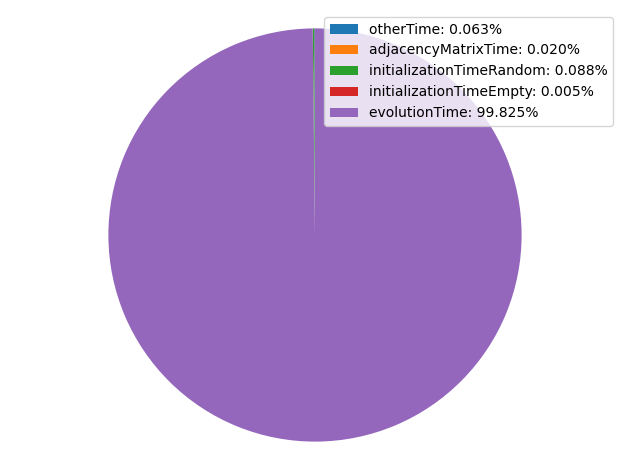

In [8]:
sizes = df_sequential[['otherTime', 'distanceTime', 'initializationTimeRandom', 'initializationTimeEmpty', 'evolutionTime']].iloc[0].values
# Normalize sizes in 0-100
sizes = sizes / sizes.sum() * 100
labels=['otherTime', 'adjacencyMatrixTime', 'initializationTimeRandom', 'initializationTimeEmpty', 'evolutionTime']

plt.pie(sizes, startangle=90)
handles, _ = plt.gca().get_legend_handles_labels()
legend_labels = [f'{label}: {size:.3f}%' for label, size in zip(labels, sizes)]
plt.legend(legend_labels, loc='best')

plt.axis('equal')
plt.tight_layout()
plt.show()

Exclude evolutionTime

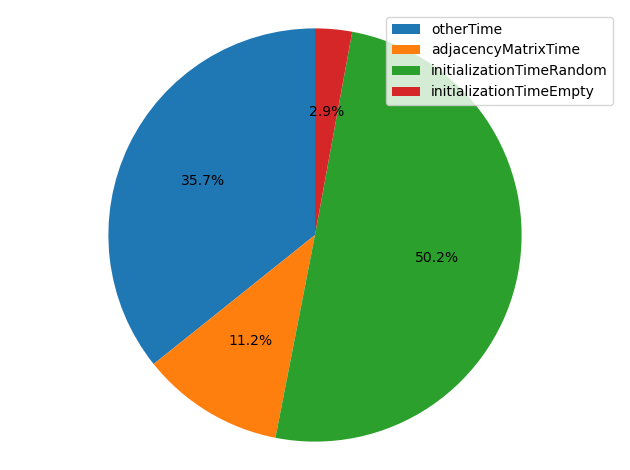

In [9]:
sizes = df_sequential[['otherTime', 'distanceTime', 'initializationTimeRandom', 'initializationTimeEmpty']].iloc[0].values

plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.legend(labels=['otherTime', 'adjacencyMatrixTime', 'initializationTimeRandom', 'initializationTimeEmpty'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Internal times in evolutionTime

In [10]:
sizes = df_sequential[['crossoverTime', 'mutationTime', 'fitnessTime']].iloc[0].values

plt.pie(sizes, autopct='%1.4f%%', startangle=90, colors=['sienna', 'teal', 'pink'])
plt.legend(labels=['crossoverTime', 'mutationTime', 'fitnessTime'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

/home/giacomo/mambaforge/envs/continual/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3162: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

# Parallelization total time analysis

In [11]:
df_threads = pd.read_csv('results/threads_results.csv')
df_threads.head()

,numWorkers,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,1,5.322810e-07,38438368,21467,91895,6678,38251287,0,0,0
1,2,5.423220e-07,20299077,10913,118156,4039,20098941,0,0,0
2,4,5.305860e-07,15544731,5663,218005,2101,15250772,0,0,0
3,6,5.280410e-07,14305638,6294,362903,3243,13865420,0,0,0
4,8,5.433550e-07,10811001,5332,362054,2656,10372031,0,0,0


In [12]:
df_ff = pd.read_csv('results/ff_results.csv')
df_ff.head()

,numWorkers,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,1,5.498010e-07,106206620,103948,174796,87561,105691954,0,0,0
1,2,5.402640e-07,24366289,92543,193066,99670,23832454,0,0,0
2,4,5.374510e-07,13966642,92243,456905,83515,13183913,0,0,0
3,6,5.371290e-07,13643528,100480,610848,93370,12683006,0,0,0
4,8,5.595500e-07,8819002,86203,586323,99267,7875261,0,0,0


In [13]:
num_workers_list = df_threads['numWorkers'].values

In [14]:
total_times_threads = df_threads['totalTime'].iloc[0:17]
total_times_ff = df_ff['totalTime'].iloc[0:17]

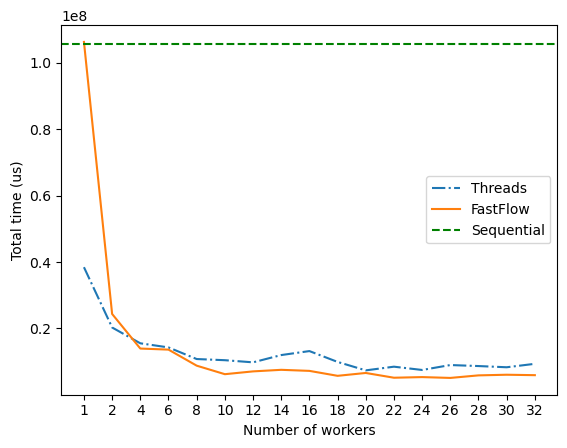

In [15]:
plt.plot(total_times_threads, label='Threads', linestyle='dashdot')
plt.plot(total_times_ff, label='FastFlow')
plt.axhline(y=df_sequential['totalTime'].iloc[0], color='green', label='Sequential', linestyle='dashed')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Total time (us)')
plt.xticks(ticks=[i for i in range(len(num_workers_list))], labels=num_workers_list)

plt.show()

### Speedup

In [16]:
df_threads['speedup'] = df_sequential['totalTime'].iloc[0] / df_threads['totalTime']
df_ff['speedup'] = df_sequential['totalTime'].iloc[0] / df_ff['totalTime']

In [17]:
print(df_threads[['numWorkers','speedup']])
print(df_ff[['numWorkers','speedup']])


    numWorkers    speedup
0            1   2.745339
1            2   5.198579
2            4   6.788561
3            6   7.376557
4            8   9.761016
5           10  10.087411
6           12  10.749407
7           14   8.789226
8           16   7.991215
9           18  10.613023
10          20  14.255209
11          22  12.399597
12          24  14.026405
13          26  11.718003
14          28  12.127637
15          30  12.658426
16          32  11.256593
    numWorkers    speedup
0            1   0.993595
1            2   4.330834
2            4   7.555599
3            6   7.734535
4            8  11.965793
5           10  16.874213
6           12  14.870668
7           14  13.944730
8           16  14.556110
9           18  18.312068
10          20  15.937241
11          22  20.337478
12          24  19.614600
13          26  20.568526
14          28  17.896339
15          30  17.328764
16          32  17.709947


In [18]:
ideal_times = [df_sequential['totalTime'].iloc[0]/i for i in num_workers_list]
ideal_speedup = [i for i in num_workers_list]
print(ideal_speedup)

[1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]


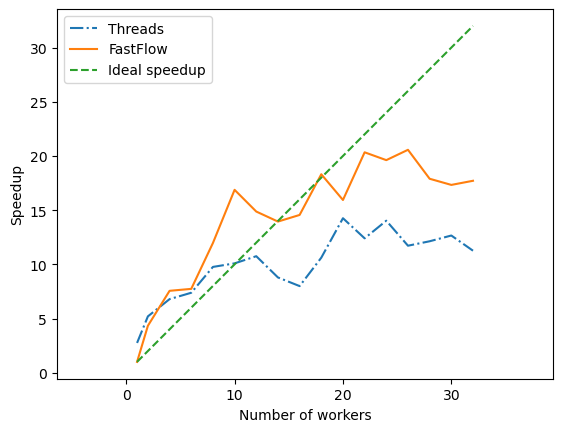

In [19]:
plt.plot(num_workers_list, df_threads['speedup'].iloc[0:17], label='Threads', linestyle='dashdot')
plt.plot(num_workers_list, df_ff['speedup'].iloc[0:17], label='FastFlow')
plt.plot(num_workers_list, ideal_speedup, linestyle='dashed', label='Ideal speedup')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.axis('equal')

# set plot size
plt.rcParams["figure.figsize"] = (8, 8)

plt.show()